In [2]:
from keras.preprocessing import image
import numpy as np
import os
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
%matplotlib inline

mat = scipy.io.loadmat('../Data/cars_annos.mat')

print("Downloaded file 'cars_annos.mat' read as a dictionary under the variable 'mat'")
print("Keys of the dict mat are: {}".format(mat.keys()))

Using TensorFlow backend.


Downloaded file 'cars_annos.mat' read as a dictionary under the variable 'mat'
Keys of the dict mat are: dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])


In [3]:
print("Number of classes: {}".format(len(mat['class_names'][0])))
print((mat['annotations'][0][5]))

Number of classes: 196
(array(['car_ims/000006.jpg'], dtype='<U18'), array([[10]], dtype=uint8), array([[6]], dtype=uint8), array([[250]], dtype=uint8), array([[110]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))


In [4]:
class_labels = mat['class_names'][0]
print(str(class_labels[5]))

['Acura Integra Type R 2001']


In [5]:
def bringAnnot(fileName):
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    
    print((mat['annotations'][0][numb-1]))    

def bringup_ClassLabel(fileName):
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    
    #print("Class of image {}: {}".format(fileName, class_labels[int(mat['annotations'][0][numb-1][5])-1][0]))
    return class_labels[int(mat['annotations'][0][numb-1][5])-1][0]

def getPath(number):
    fileName  = str('0') * int(6 - len(str(number)))
    fileName += str(number)+".jpg"
    return ("../Data/car_ims/"+fileName)

In [9]:
bringAnnot(8589)

(array(['car_ims/008589.jpg'], dtype='<U18'), array([[24]], dtype=uint8), array([[79]], dtype=uint8), array([[620]], dtype=uint16), array([[262]], dtype=uint16), array([[105]], dtype=uint8), array([[1]], dtype=uint8))


In [10]:
bringAnnot('000003.jpg')

(array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))


In [11]:
bringup_ClassLabel('001113.jpg')

'Audi TTS Coupe 2012'

In [12]:
img = image.load_img("../Data/car_ims/000012.jpg", target_size=(64,64))
print(type(img))

<class 'PIL.Image.Image'>


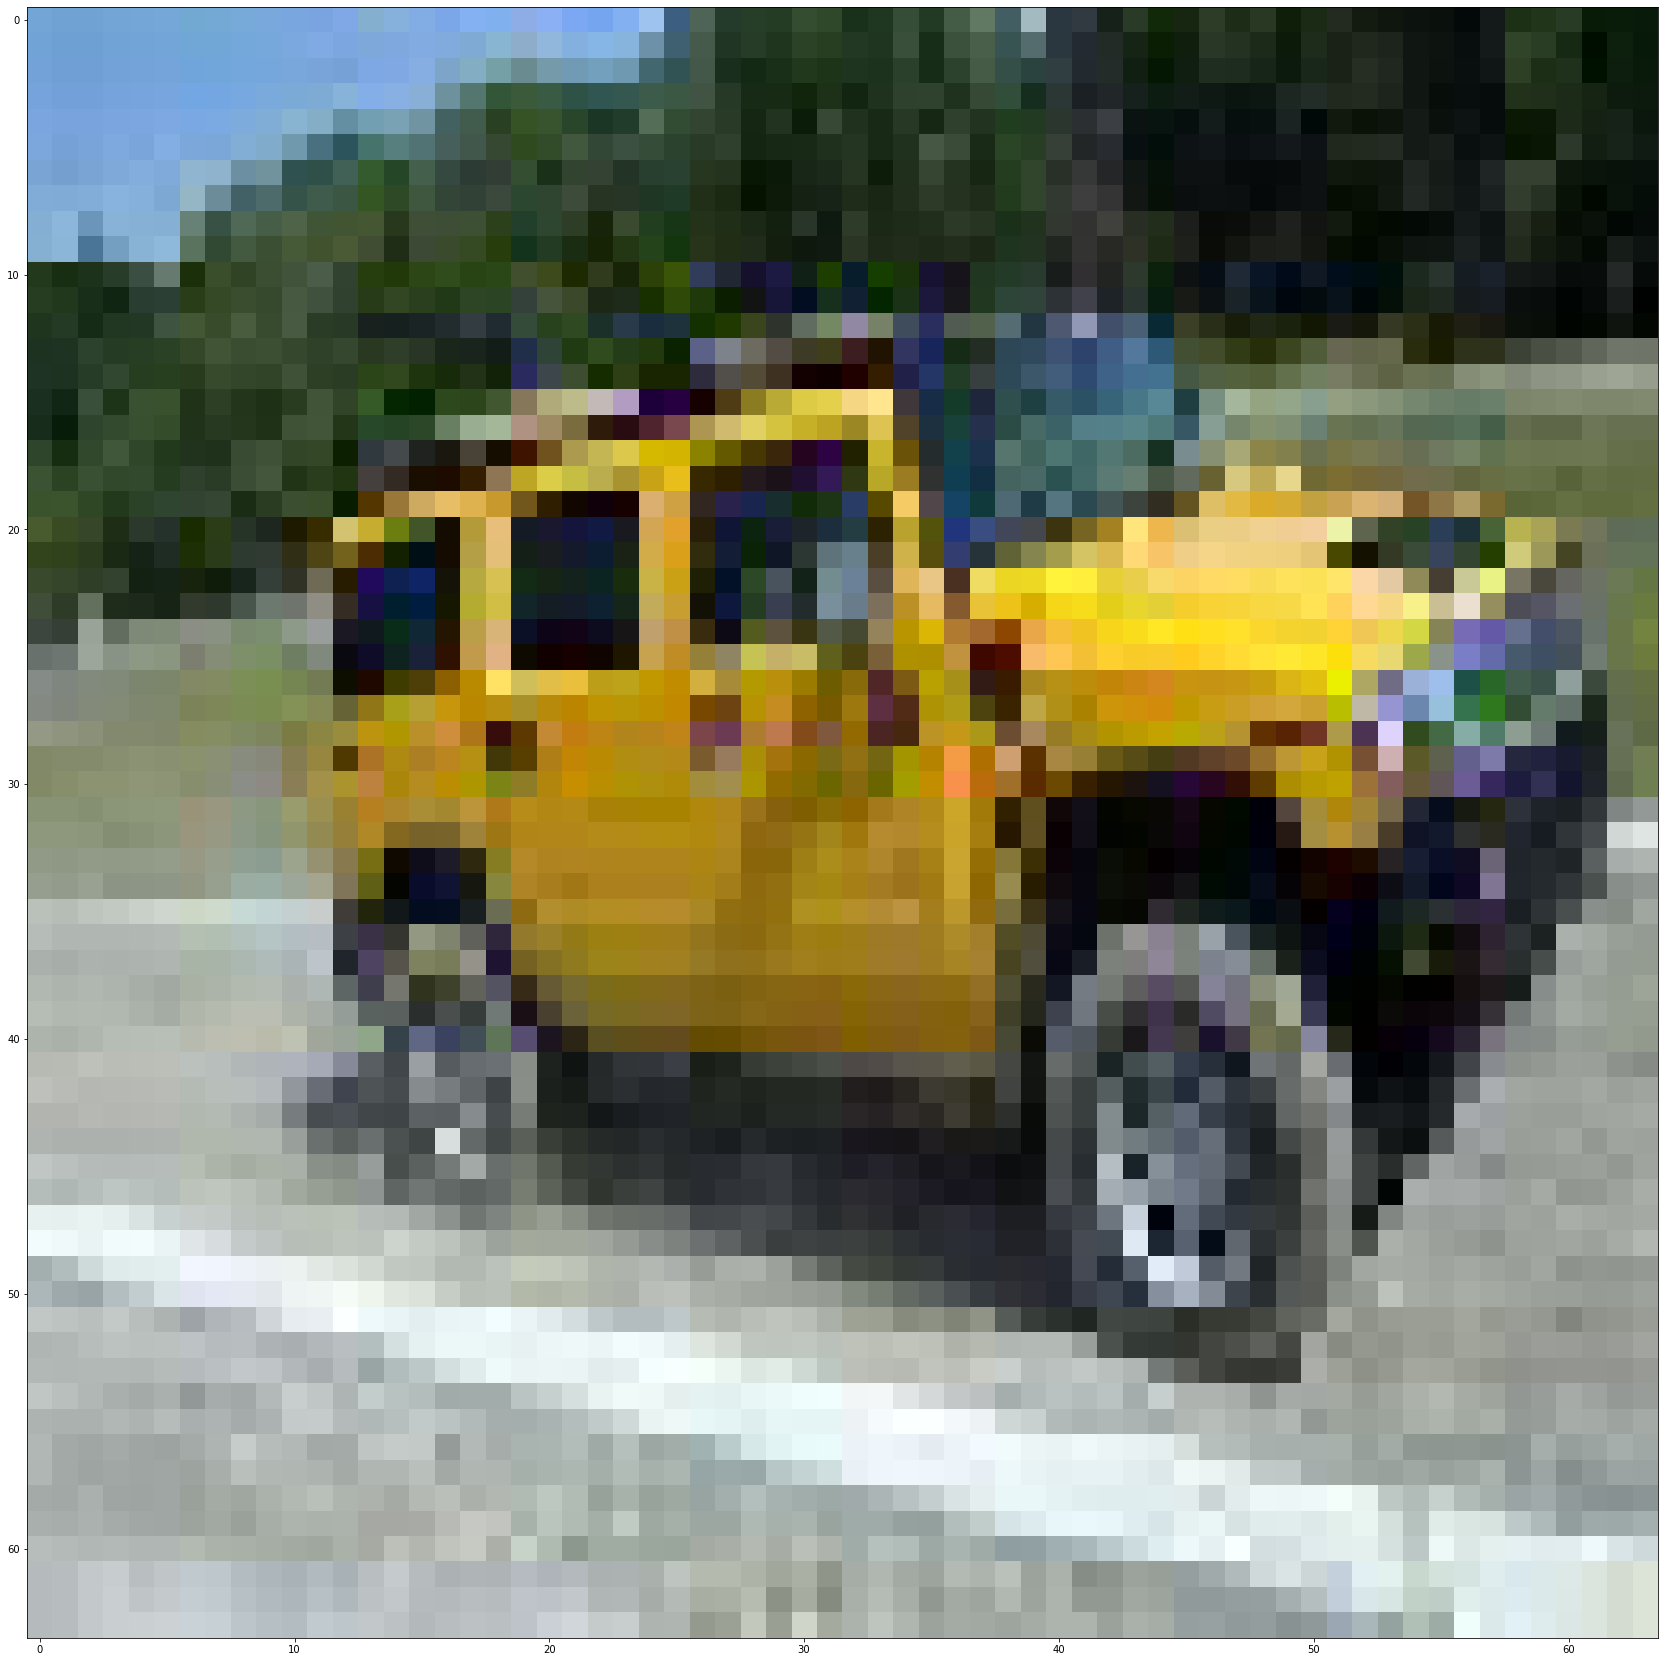

In [13]:
plt.imshow(img)

In [6]:
def showRandomNxN(N):
    '''
    Function to plot the MNIST data on a grid of NxN
    '''
    plt.rcParams['figure.figsize'] = [30, 30]
    
    listofRand = np.random.randint(1, 16185, size=int(N*N))
    
    image_size = (128, 128)
    
    fig = plt.figure()
    
    for i in range(0, N*N):
        fileName =  str('0')*int(6 - len(str(listofRand[i])))+str(listofRand[i])+".jpg"
        img = image.load_img("../Data/car_ims/"+fileName, target_size=image_size)
        ax = fig.add_subplot(N, N, i+1)
        imgplot = ax.imshow(img)
        ax.set_title(bringup_ClassLabel(fileName))
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show();

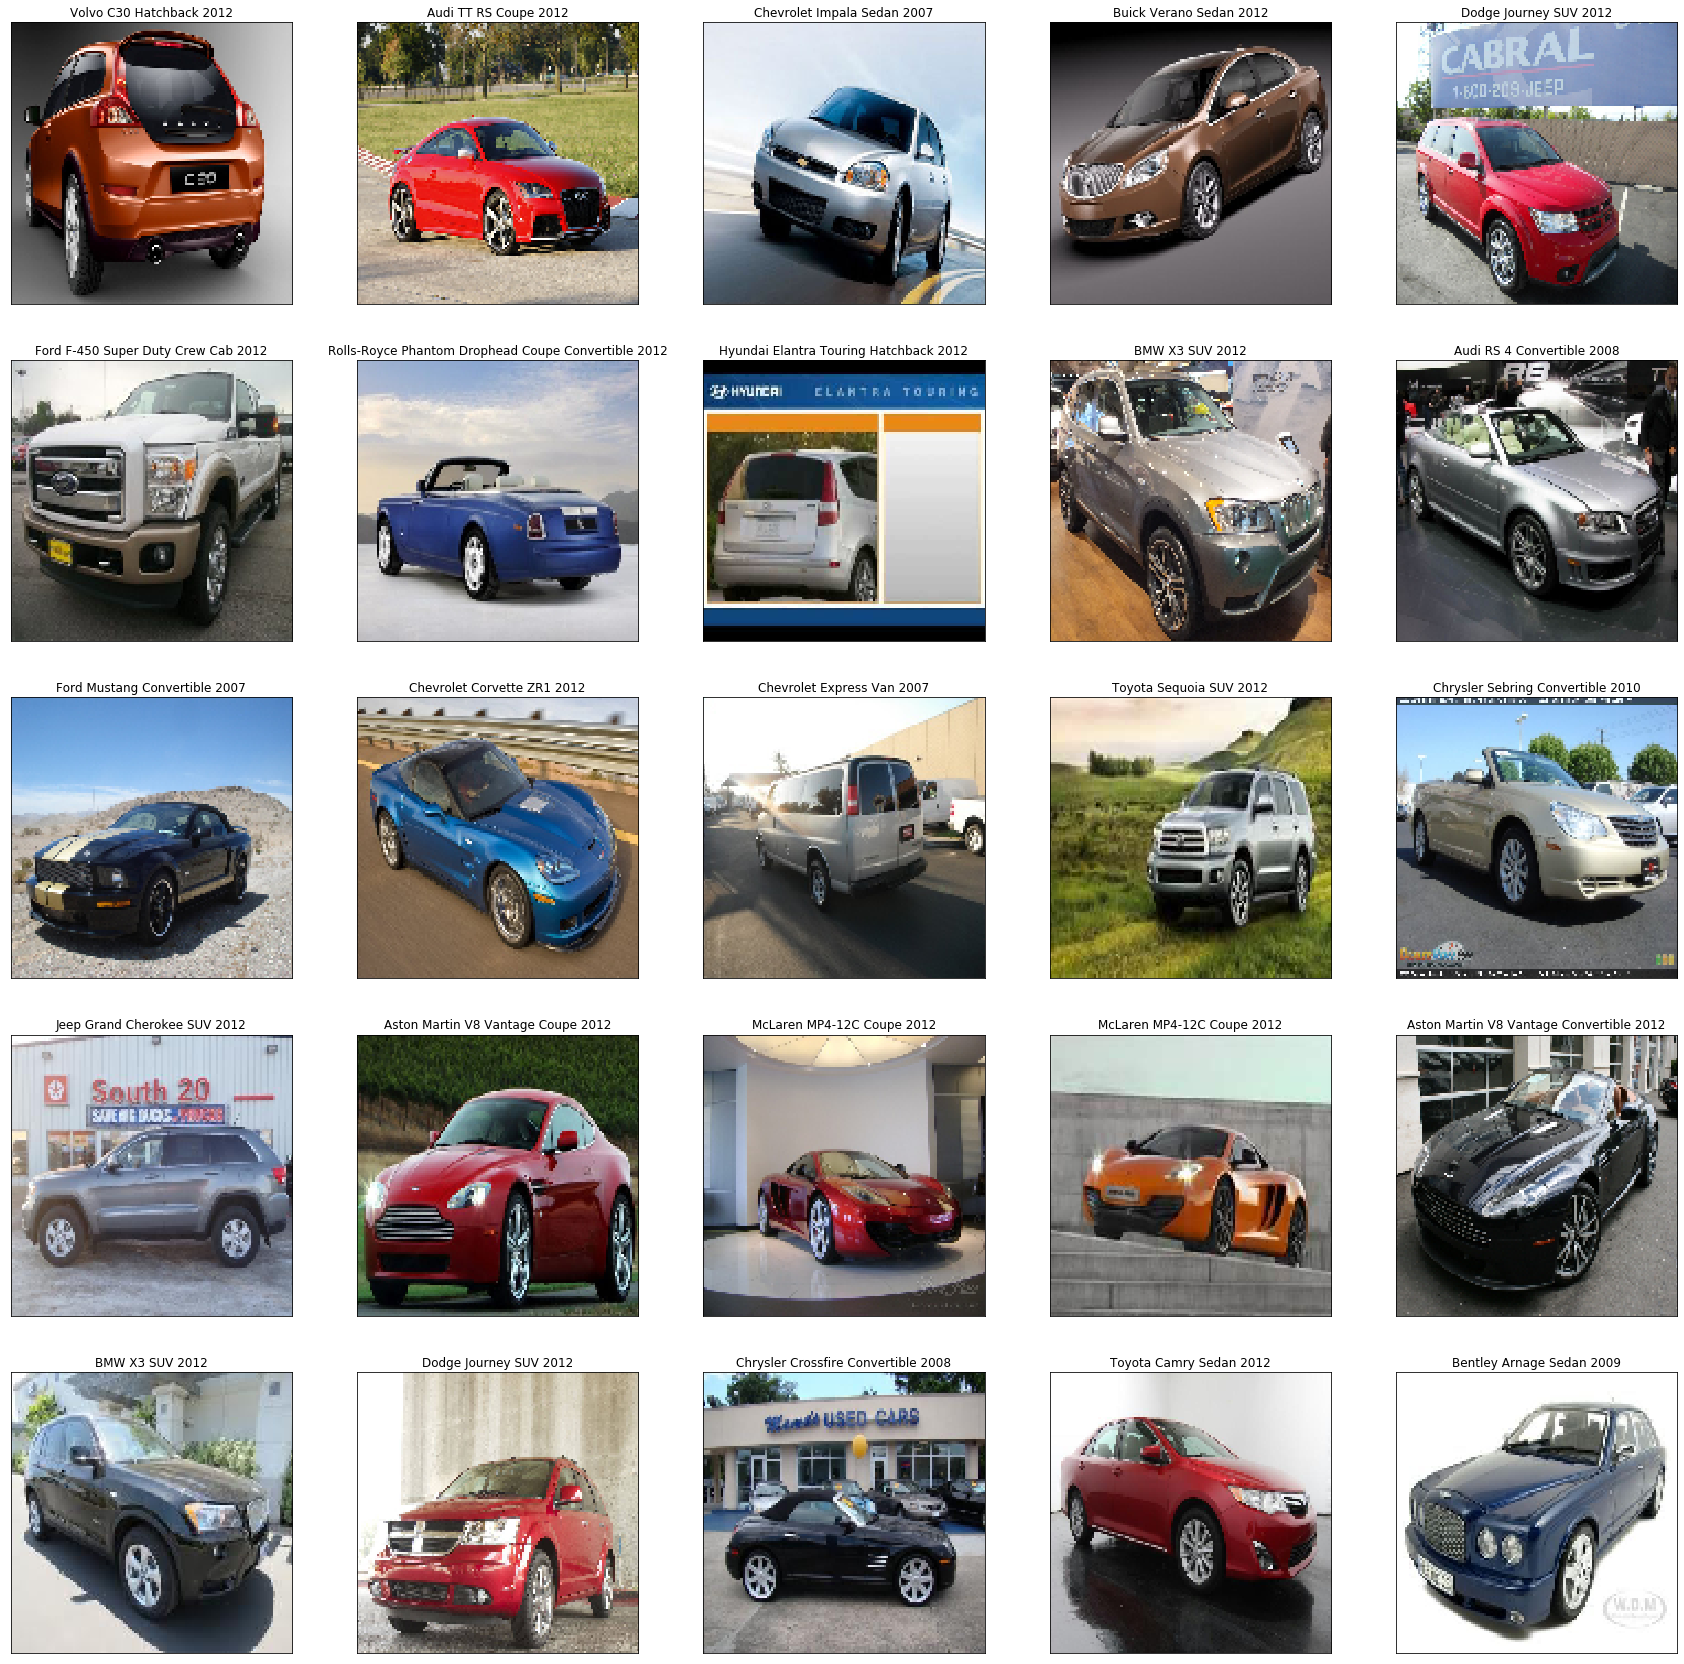

In [15]:
showRandomNxN(5)

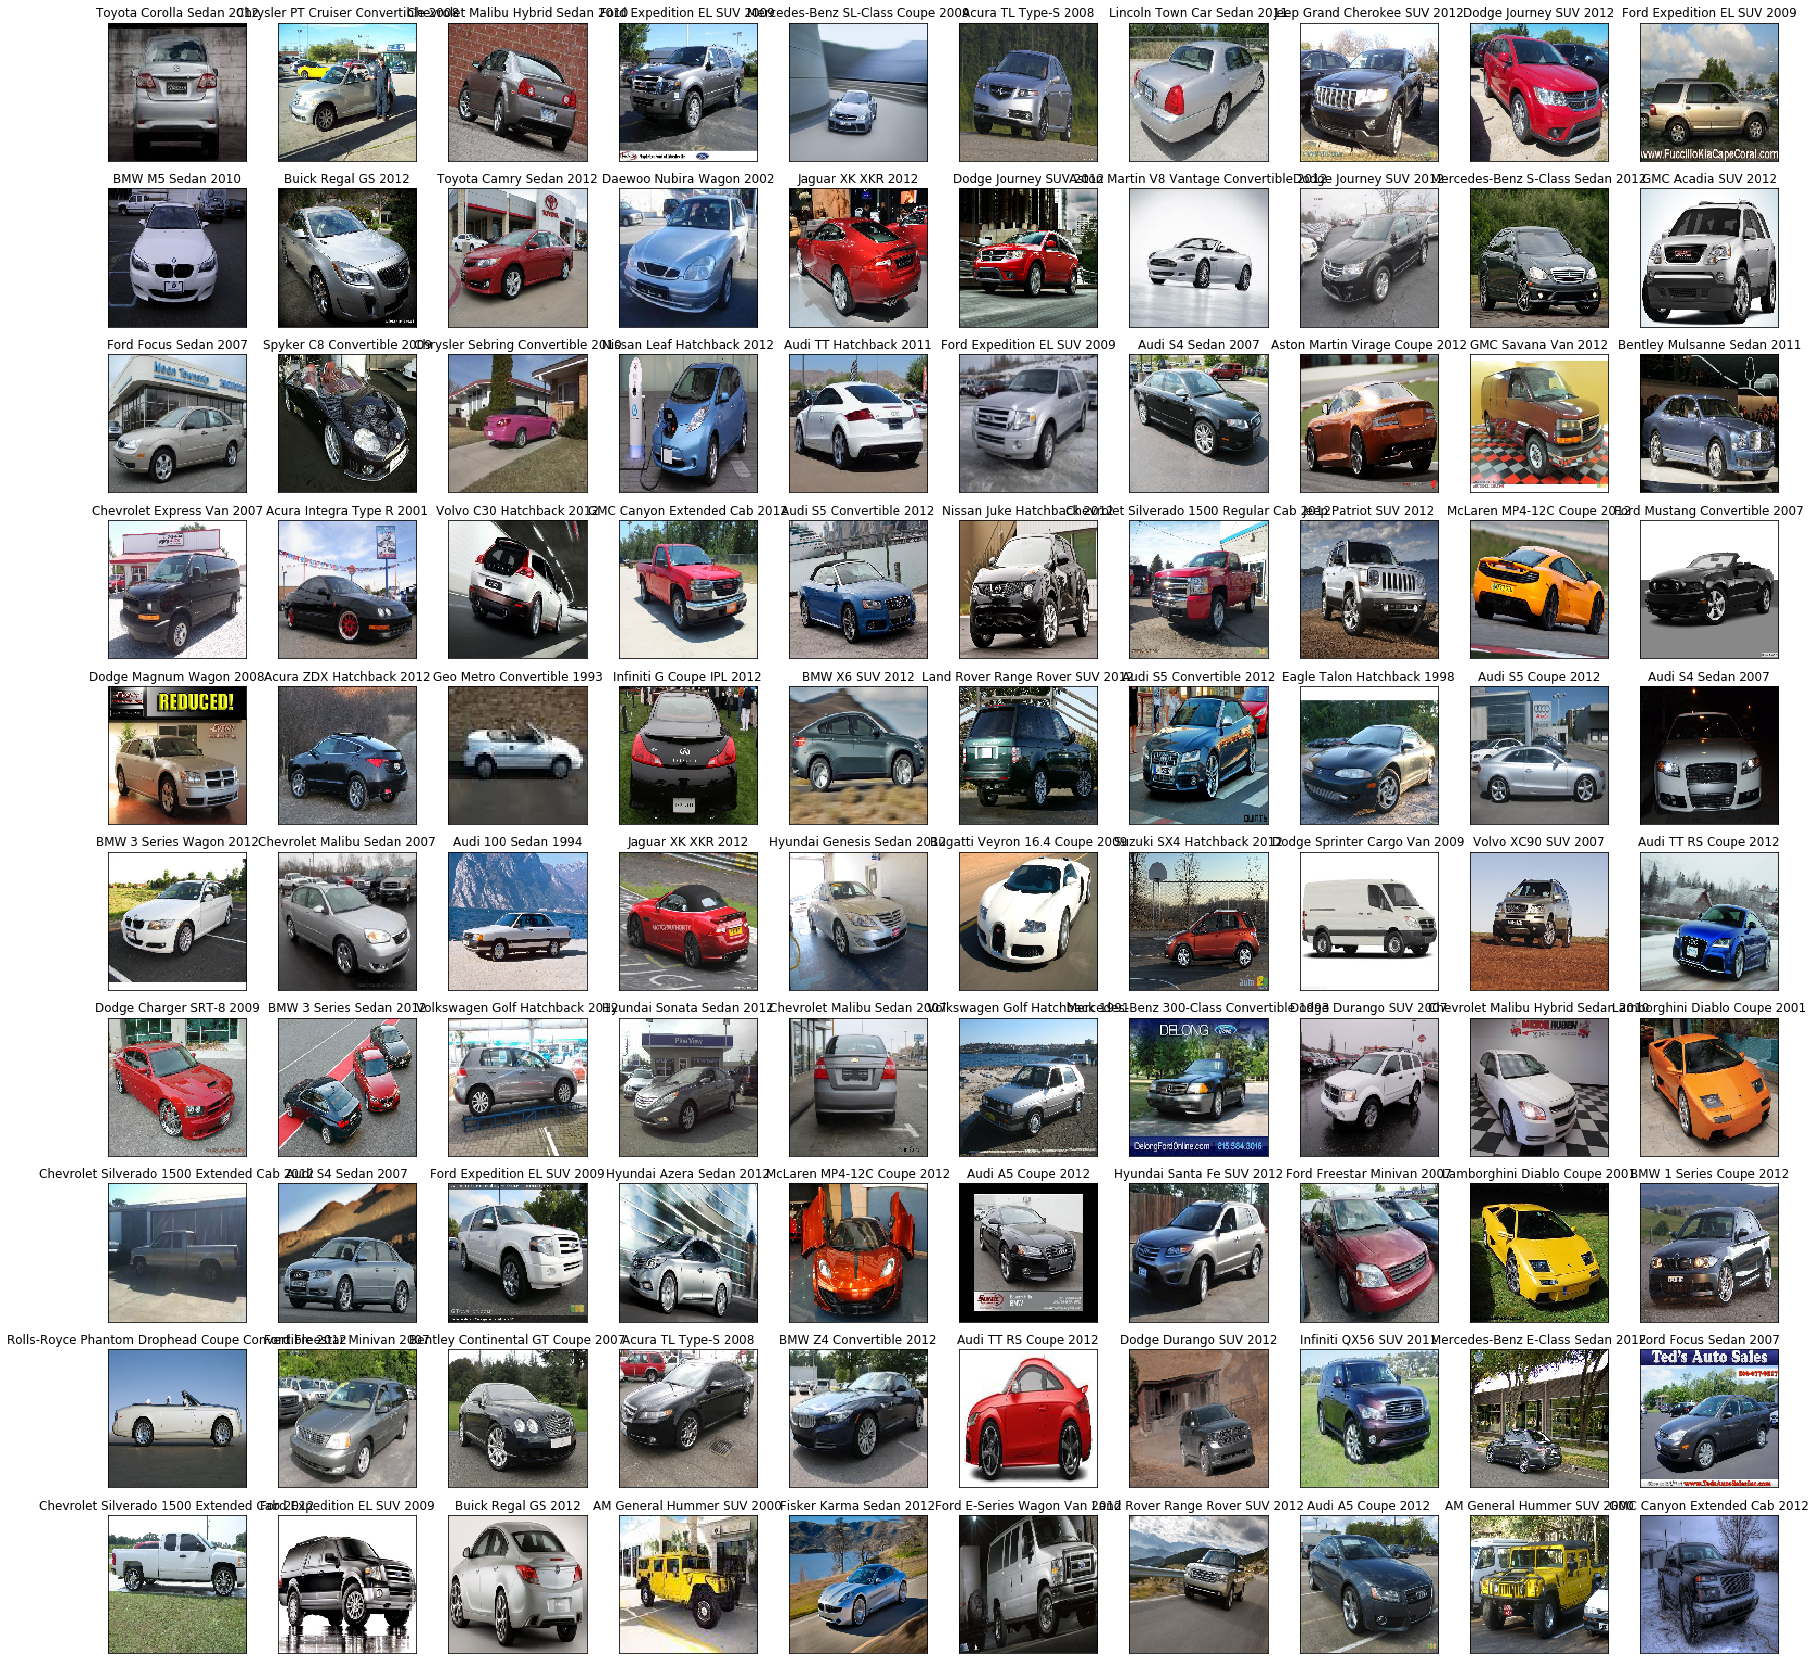

In [16]:
showRandomNxN(10)

In [17]:
bringAnnot('016120.jpg')

(array(['car_ims/016120.jpg'], dtype='<U18'), array([[78]], dtype=uint8), array([[289]], dtype=uint16), array([[669]], dtype=uint16), array([[633]], dtype=uint16), array([[196]], dtype=uint8), array([[0]], dtype=uint8))


In [18]:
bringup_ClassLabel('016120.jpg')

'smart fortwo Convertible 2012'

In [7]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [8]:
model = VGG16(weights='imagenet', include_top=True)

img_path =  getPath(1781)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#features = model.predict(x)

Instructions for updating:
Colocations handled automatically by placer.


KeyboardInterrupt: 

In [10]:
import pandas as pd
def features_Model(numb, model, saveFeatures="../Data/features/temp.csv"):
    """
    Created features (1000 dimensions) for images from 'model'
    gets the file path from func getPath
    
    Args: numb = [1, 2, 3 ... 16] + manually extract (16001 to 16185)
    Returns: Returns none, but saves the features at "saveFeatures" location
    
    """

    num_of_imgs = numb*1000 #16185
    feature_df = pd.DataFrame()
    
    for jpegImg in range(num_of_imgs + 1 - 1000, num_of_imgs + 1): #loop over image numbers: 1 to 16185
        img_path =  getPath(jpegImg)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        feature_df = feature_df.append(pd.DataFrame(features), ignore_index=True)
        
        if jpegImg % 500 ==0:
            print("Done upto image {}".format(jpegImg))
    
    feature_df.to_csv(saveFeatures)
    #return feature_df

In [42]:
VGG16_model = VGG16(weights='imagenet', include_top=True)
saveVGG16 = "../Data/features/featuresVGG16.csv"
runVGG16_for_features = features_Model(VGG16_model, saveVGG16)

Done upto image 500
Done upto image 1000


In [44]:
VGG16_model = VGG16(weights='imagenet', include_top=True)

for i in range(2, 5):
    saveVGG16 = "../Data/features/featuresVGG16"+"_"+str(i)+".csv"
    runVGG16_for_features = features_Model(i, VGG16_model, saveVGG16)


Done upto image 1500
Done upto image 2000
Done upto image 2500
Done upto image 3000
Done upto image 3500
Done upto image 4000


In [11]:
VGG16_model = VGG16(weights='imagenet', include_top=True)

for i in range(9, 14):
    saveVGG16 = "../Data/features/featuresVGG16"+"_"+str(i)+".csv"
    runVGG16_for_features = features_Model(i, VGG16_model, saveVGG16)



Done upto image 8500
Done upto image 9000
Done upto image 9500
Done upto image 10000
Done upto image 10500
Done upto image 11000
Done upto image 11500
Done upto image 12000
Done upto image 12500
Done upto image 13000


In [12]:
VGG16_model = VGG16(weights='imagenet', include_top=True)

for i in range(14, 17):
    saveVGG16 = "../Data/features/featuresVGG16"+"_"+str(i)+".csv"
    runVGG16_for_features = features_Model(i, VGG16_model, saveVGG16)

Done upto image 13500
Done upto image 14000
Done upto image 14500
Done upto image 15000
Done upto image 15500
Done upto image 16000


In [ ]:
num_of_imgs = numb*1000 #16185
    feature_df = pd.DataFrame()
    
    for jpegImg in range(num_of_imgs + 1 - 1000, num_of_imgs + 1): #loop over image numbers: 1 to 16185
        img_path =  getPath(jpegImg)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        feature_df = feature_df.append(pd.DataFrame(features), ignore_index=True)

In [14]:
model = VGG16(weights='imagenet', include_top=True)

img_path =  getPath(16120)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [18]:
print((features))

[[5.51021731e-06 2.31306828e-07 3.49398329e-06 1.36434676e-06
  8.65076800e-06 6.01584020e-07 5.83671579e-07 1.00636702e-04
  4.08953274e-05 3.59678350e-04 1.94948242e-07 1.06434641e-06
  6.08507548e-07 5.71605028e-07 5.70774091e-06 5.84968620e-06
  2.47098387e-06 8.14322357e-06 4.81352821e-04 1.88619163e-06
  2.47276853e-06 2.17003580e-05 4.65587291e-05 5.66055591e-04
  1.19174483e-05 8.24343442e-06 2.58614591e-06 1.45977265e-06
  1.81195821e-06 9.28378370e-07 1.69667658e-06 1.77796267e-06
  9.31119928e-07 5.77000128e-06 1.34475064e-04 1.58508301e-05
  3.43622232e-05 6.99445764e-06 1.04106300e-06 7.31825412e-06
  3.49074935e-06 5.17232138e-07 4.09143422e-06 5.62224955e-07
  8.92668027e-07 2.05453193e-06 2.21393020e-06 3.37607571e-06
  1.42068507e-06 3.95769575e-06 1.65672918e-05 1.08579789e-05
  1.98250382e-06 3.16622572e-06 2.67170708e-06 4.54349788e-07
  7.39906272e-06 1.48369998e-06 8.24459767e-06 1.88042975e-06
  7.05637785e-06 2.45665819e-06 1.96218753e-06 4.73037153e-06
  1.3119

In [22]:
i=-2
from keras.models import Model

model_test = Model(inputs=model.input, outputs=model.layers[i].output)
test_features = model_test.predict(x)
print(test_features.shape)
print(np.sum(test_features))

(1, 4096)
[[0. 0. 0. ... 0. 0. 0.]]
